Set up a Virtual Enviroment

In [ ]:
!python -m venv .env

Inside your venv, install diffusers

In [ ]:
!pip install diffusers

Install pytorch, check which version you need on their website. You may need to download a less recent version of CUDA for it to work. 

In [ ]:
!pip3 install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu121

Diffusers needs transformers to work.

In [ ]:
!pip install diffusers["torch"] transformers

## Testing it all works!

First we import torch, and ensure that torch can detect our GPU

In [1]:
import torch

In [ ]:
torch.cuda.is_available()

Import the Diffusion Pipeline

In [ ]:
from diffusers import DiffusionPipeline

Load a model into the pipeline - we choose stable-diffusion-v1-5

In [ ]:
model_id = "runwayml/stable-diffusion-v1-5"
pipeline = DiffusionPipeline.from_pretrained(model_id, torch_dtype=torch.float16, use_safetensors=True)

In [5]:
pipeline = pipeline.to("cuda")

Initiate a generator and a prompt

In [6]:
generator = torch.Generator("cuda").manual_seed(0)

In [57]:
prompt = "A dog taking a huge bite out of a blueberry pie. There is a dog."

Generate an image!

In [ ]:
image = pipeline(prompt, generator = generator, height=512, width=512).images[0]

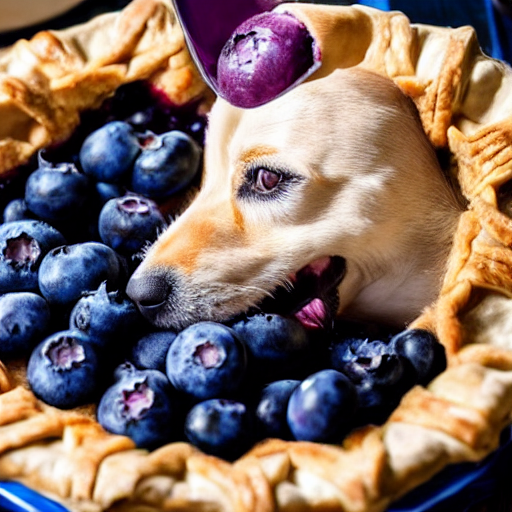

In [59]:
image